In [1]:
import numpy as np
import pandas as pd
import os

In [147]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [473]:
from utils import MSE

In [3]:
os.getcwd()

'C:\\Users\\Usuario\\Documents\\Proyecto_Final'

In [6]:
data_horas = pd.read_csv("Datos_csv.csv")

In [8]:
# Este dataframe contiene el consumo de todas las horas en cierto intervalo de tiempo:
data_horas[0:24]

muestras  anio   fecha  hora_inicio  hora_fin     dema_int     dem_inst  \
0          1  2017  01-sep            0         1  6872.013385  6976.172363   
1          2  2017  01-sep            1         2  6660.573651  6709.388672   
2          3  2017  01-sep            2         3  6504.232961  6568.017090   
3          4  2017  01-sep            3         4  6435.836442  6502.294434   
4          5  2017  01-sep            4         5  6437.741557  6384.402344   
5          6  2017  01-sep            5         6  6520.068903  6426.338379   
6          7  2017  01-sep            6         7  6879.321252  6600.442383   
7          8  2017  01-sep            7         8  7312.121555  7122.660156   
8          9  2017  01-sep            8         9  7607.777175  7421.090820   
9         10  2017  01-sep            9        10  7853.604396  7789.145508   
10        11  2017  01-sep           10        11  7950.773802  7868.993652   
11        12  2017  01-sep           11        12  8031.550572  8070.657227   
12        13  2017  01-sep           12        13  8104.972262  8078.395508   
13        14  2017  01-sep           13        14  8125.824147  8168.154297   
14        15  2017  01-sep           14        15  8071.031945  8129.143555   
15        16  2017  01-sep           15        16  8045.984608  7951.537598   
16        17  2017  01-sep           16        17  8053.916788  8055.689453   
17        18  2017  01-sep           17        18  7886.749222  8049.655273   
18        19  2017  01-sep           18        19  7572.385483  7661.959961   
19        20  2017  01-sep           19        20  7410.154346  7443.925781   
20        21  2017  01-sep           20        21  7843.120252  7500.266113   
21        22  2017  01-sep           21        22  7858.391412  7981.366699   
22        23  2017  01-sep           22        23  7570.684273  7702.476074   
23        24  2017  01-sep           23        24  7220.217254  7373.834961   

    aniomovil  
0           1  
1           1  
2           1  
3           1  
4           1  
5           1  
6           1  
7           1  
8           1  
9           1  
10          1  
11          1  
12          1  
13          1  
14          1  
15          1  
16          1  
17          1  
18          1  
19          1  
20          1  
21          1  
22          1  
23          1

Nos interesa obtener un promedio de la demanda, en este caso *dema_int*

In [9]:
data_horas["dema_int"].mean()

7745.438582716139

Ahora de un sólo día

In [13]:
data_aux = data_horas[0:24]
data_aux["dema_int"].mean()

7451.210318458332

Ahora haremos una prueba pequeña para obtener el promedio de dos días distintos consecutivos y guardarlos en arreglo

In [18]:
print(range(0,49))

range(0, 49)


In [24]:
prom_aux = []
for i in range(0,2):
    ini = 24*i
    end = 24*(1+i)
    data_i = data_horas[ini:end]
    prom_aux.append(data_i["dema_int"].mean())

In [25]:
prom_aux

[7451.210318458332, 7146.067214083334]

Se aprecia que funciona el algoritmo, al comparar la priemra entrada con el promedio obtenido anteriormente, por lo que el algoritmo funciona.

Ahora, para aplicarlo a todo el *dataframe* veamos el número total de filas que hay y dividámoslas entre 24

In [26]:
data_horas.describe()

muestras          anio   hora_inicio      hora_fin      dema_int  \
count  25152.000000  25152.000000  25152.000000  25152.000000  25152.000000   
mean    4209.362595   2018.605797     11.500000     12.500000   7745.438583   
std     2448.412619      0.919625      6.922324      6.922324    974.363777   
min        1.000000   2017.000000      0.000000      1.000000   4288.339301   
25%     2096.750000   2018.000000      5.750000      6.750000   7011.455212   
50%     4192.500000   2019.000000     11.500000     12.500000   7807.317117   
75%     6288.250000   2019.000000     17.250000     18.250000   8484.490007   
max     8760.000000   2020.000000     23.000000     24.000000  10567.494660   

           dem_inst     aniomovil  
count  25152.000000  25152.000000  
mean    7734.933778      1.955153  
std      977.956108      0.806060  
min     4230.882324      1.000000  
25%     6998.106567      1.000000  
50%     7794.049072      2.000000  
75%     8478.522950      3.000000  
max    11267.710940      3.000000

Como curiosidad hay datos categóricos que están guardados como numéricos.

Se observa que hay 25152 filas por lo que esl número de horas que tenemos que graficar pero nos interesa el promeido por días

In [43]:
horas_tot = 25152

In [44]:
num_d = int(horas_tot/24)
print("Número total de días registrados: " + str(num_d))

Número total de días registrados: 1048


In [72]:
prom_dia = []
for i in range(0,num_d):
    ini = 24*i
    end = 24*(1+i)
    data_i = data_horas[ini:end]
    prom_dia.append(data_i["dema_int"].mean())

In [73]:
prom_dia

[7451.210318458332,
 7146.067214083334,
 6269.901368708334,
 7285.864061833334,
 7467.377057666668,
 7350.776126875,
 7380.972576166668,
 7297.2998214166655,
 7079.543496708334,
 6224.801165875,
 7165.9037953333345,
 7565.3649512500015,
 7683.822079666667,
 7725.2997498333325,
 7376.719321958332,
 6287.737613291666,
 6193.76936625,
 7489.720982208336,
 7937.884017291665,
 8018.761829125,
 8013.481939124999,
 7854.197579,
 7349.7897858333345,
 6397.255619749998,
 7254.2920595,
 7592.786073875,
 7585.760586375,
 7546.526967583334,
 7432.418684499998,
 7011.618865875,
 6062.159845041667,
 7098.151923541666,
 7454.4150205,
 7506.664070083334,
 7618.149702874999,
 7726.741366916664,
 7300.932150916667,
 6303.268214791667,
 7369.300689625002,
 7669.531978041666,
 7483.947533416668,
 7468.2812829583345,
 7542.223823666666,
 7284.695960791666,
 6461.682399875,
 7472.603477541669,
 7817.763591916668,
 7855.055796958334,
 7946.716258708333,
 8004.428492958334,
 7599.223313208334,
 6659.10053675,

In [47]:
type(prom_dia)

list

In [175]:
prom_a_dia = np.array(prom_dia)
print("")
x_dia = np.array(list(range(1,len(prom_dia)+1)))
print(x_dia)


[   1    2    3 ... 1046 1047 1048]


In [74]:
data_dia = pd.DataFrame(prom_dia, columns = ['Promedio']) 

In [176]:
dia = pd.DataFrame(x_dia, columns = ['Dia']) 
data_dia['Dia'] = dia['Dia']

In [177]:
data_dia

Promedio   Dia
0     7451.210318     1
1     7146.067214     2
2     6269.901369     3
3     7285.864062     4
4     7467.377058     5
...           ...   ...
1043  7848.961578  1044
1044  7526.288829  1045
1045  6639.114850  1046
1046  7728.451751  1047
1047  8244.691202  1048

[1048 rows x 2 columns]

**Gráficas**

In [449]:
mpoints = len(prom_dia)
x_dia_grph_1 = np.linspace(min(x_dia) , max(x_dia) , mpoints)
y_dia_grph_1 = np.array(prom_dia)

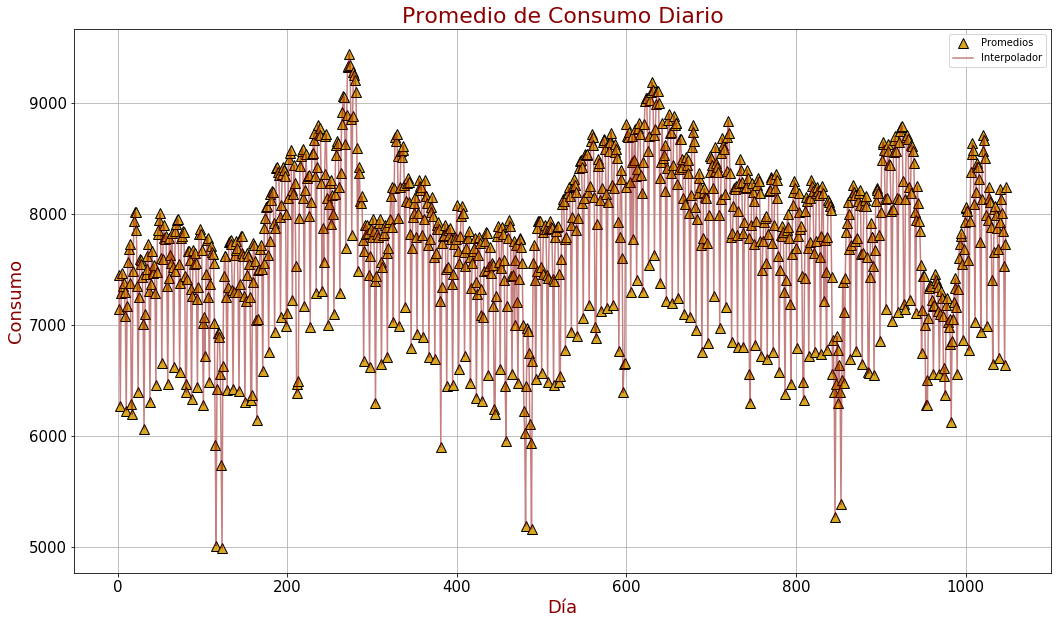

In [451]:
plt.figure(figsize = (17.5,10))
plt.plot(x_dia , prom_a_dia , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_dia_grph_1 , y_dia_grph_1 , color = 'darkred' , alpha = 0.5)
plt.title("Promedio de Consumo Diario" , fontsize = 22 , color = 'darkred')
plt.xlabel("Día" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Promedio_Dia.png')
plt.show()

+ **Semana** 

Ahora por semana, indistitanmente de a qué mes pertenezca, los días restantes se promediarán y se contarán como otra semana como se verá más adelante.

De acuerdo a las pruebas hechas nos damos cuenta que el límite del grado del polinomio que acepta, en este caso, polyfit, es 141. Sin embargo, para poner a prueba nuestro modelo, sólo necesitaremos el $80\%$ de los datos y el otro $20\%$ para hacer el test gráfico del modelo

In [54]:
aux_1 = 7
len(prom_dia)%aux_1

6

In [76]:
num_s = int(len(data_dia)/7)
print("Número total de semanas completas registradas: " + str(num_s))

Número total de semanas completas registradas: 149


In [79]:
prom_sem = []
for i in range(0,num_s):
    ini = 7*i
    end = 7*(1+i)
    data_i = data_dia[ini:end]
    prom_sem.append(data_i["Promedio"].mean())

In [80]:
prom_sem

[7193.166960541667,
 7248.862151440476,
 7331.153581321428,
 7368.65838170238,
 7169.082587488096,
 7331.714745238096,
 7482.9630442083335,
 7616.737792059524,
 7431.334553517858,
 7593.32658827381,
 7556.521984488094,
 7268.933052619047,
 7337.91220902381,
 7440.170972142857,
 7140.116526773809,
 7413.941581541666,
 6539.3820072976205,
 6550.370594440476,
 7413.5308106785715,
 7401.275319869047,
 7429.139407190477,
 7301.5526203750005,
 7190.300327196428,
 7213.042748505953,
 7609.114174238096,
 7817.782800696428,
 8019.149876482143,
 8093.100807672619,
 7947.070357208334,
 8063.0458459880965,
 7547.0522556845235,
 8186.744827011905,
 8167.383612345237,
 8440.261563178572,
 8115.990275011906,
 8062.677836351191,
 8178.600963005952,
 8476.134066755953,
 8909.141679017857,
 8947.921018113095,
 8312.816144863096,
 7696.614855089288,
 7589.655276708333,
 7499.96991792262,
 7602.322980880954,
 7710.36235335119,
 8206.044534458333,
 8195.104091000001,
 8149.365474339285,
 7783.062603738095,

Agreguemos ahora el promedio de los otros seis días restantes

In [93]:
data_dia[num_s*7: num_s*7 + 6]

Promedio
1043  7848.961578
1044  7526.288829
1045  6639.114850
1046  7728.451751
1047  8244.691202

In [94]:
prom_sem.append(data_dia[num_s*7: num_s*7 + 6]["Promedio"].mean())

In [95]:
prom_sem

[7193.166960541667,
 7248.862151440476,
 7331.153581321428,
 7368.65838170238,
 7169.082587488096,
 7331.714745238096,
 7482.9630442083335,
 7616.737792059524,
 7431.334553517858,
 7593.32658827381,
 7556.521984488094,
 7268.933052619047,
 7337.91220902381,
 7440.170972142857,
 7140.116526773809,
 7413.941581541666,
 6539.3820072976205,
 6550.370594440476,
 7413.5308106785715,
 7401.275319869047,
 7429.139407190477,
 7301.5526203750005,
 7190.300327196428,
 7213.042748505953,
 7609.114174238096,
 7817.782800696428,
 8019.149876482143,
 8093.100807672619,
 7947.070357208334,
 8063.0458459880965,
 7547.0522556845235,
 8186.744827011905,
 8167.383612345237,
 8440.261563178572,
 8115.990275011906,
 8062.677836351191,
 8178.600963005952,
 8476.134066755953,
 8909.141679017857,
 8947.921018113095,
 8312.816144863096,
 7696.614855089288,
 7589.655276708333,
 7499.96991792262,
 7602.322980880954,
 7710.36235335119,
 8206.044534458333,
 8195.104091000001,
 8149.365474339285,
 7783.062603738095,

In [96]:
len(prom_sem)

150

In [141]:
prom_a_sem = np.array(prom_sem)
x_sem = np.array(list(range(1,len(prom_sem)+1)))
print(x_sem)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


In [143]:
data_sem = pd.DataFrame(prom_sem, columns = ['Promedio']) 

In [145]:
sem = pd.DataFrame(x_sem, columns = ['Semana']) 
data_sem['Semana'] = sem['Semana']

In [146]:
data_sem

Promedio  Semana
0    7193.166961       1
1    7248.862151       2
2    7331.153581       3
3    7368.658382       4
4    7169.082587       5
..           ...     ...
145  8153.383904     146
146  7986.661687     147
147  7670.239603     148
148  7793.250106     149
149  7597.501642     150

[150 rows x 2 columns]

**Interpolador:**

Si contamos los seis días restantes como otras semana se tiene 150 semanas en total donde el $80\%$ de ellas son 120 y el número más pequeño y cercano que sea múltiplo de siete es 119. Entonces, obtengamos los arrays y dataframe con estos datos

In [364]:
num_s_i = 119
prom_sem_i = []
for i in range(0,num_s_i):
    ini = 7*i
    end = 7*(1+i)
    data_i = data_dia[ini:end]
    prom_sem_i.append(data_i["Promedio"].mean())

In [365]:
prom_a_sem_i = np.array(prom_sem_i)
x_sem_i = np.array(list(range(1,len(prom_sem_i)+1)))
print(x_sem_i)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119]


In [366]:
data_sem_i = pd.DataFrame(prom_sem_i, columns = ['Promedio']) 
sem_i = pd.DataFrame(x_sem_i, columns = ['Semana']) 
data_sem_i['Semana'] = sem_i['Semana']
data_sem_i

Promedio  Semana
0    7193.166961       1
1    7248.862151       2
2    7331.153581       3
3    7368.658382       4
4    7169.082587       5
..           ...     ...
114  7799.769635     115
115  7389.288811     116
116  7853.069152     117
117  7855.596635     118
118  7709.245598     119

[119 rows x 2 columns]

Escribamos ahora el código para obtener el interpolador del $80\%$ de los datos

Ahora creemos la función correspondiente

In [471]:
d_sem = len(prom_sem_i) - 1
inter_sem = np.polyfit(x_sem_i , prom_a_sem_i , d_sem)
print(inter_sem)

[-0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  1.02843112e-140 -2.07746940e-138 -1.03477136e-136  1.12963188e-134
  2.50140808e-132  2.25355479e-130  4.99825117e-129 -1.98283329e-126
 -4.09345720e-124 -4.81133174e-122 -3.50264420e-120 -1.92477574e-119
  4.33642036e-116  8.64013701e-114

119

In [523]:
mpoints = len(prom_sem_i) + 1
x_sem_grph_1 = np.linspace(min(x_sem_i) , max(x_sem_i) , mpoints)
y_sem_grph_1 = np.polyval(inter_sem , x_sem_grph_1)

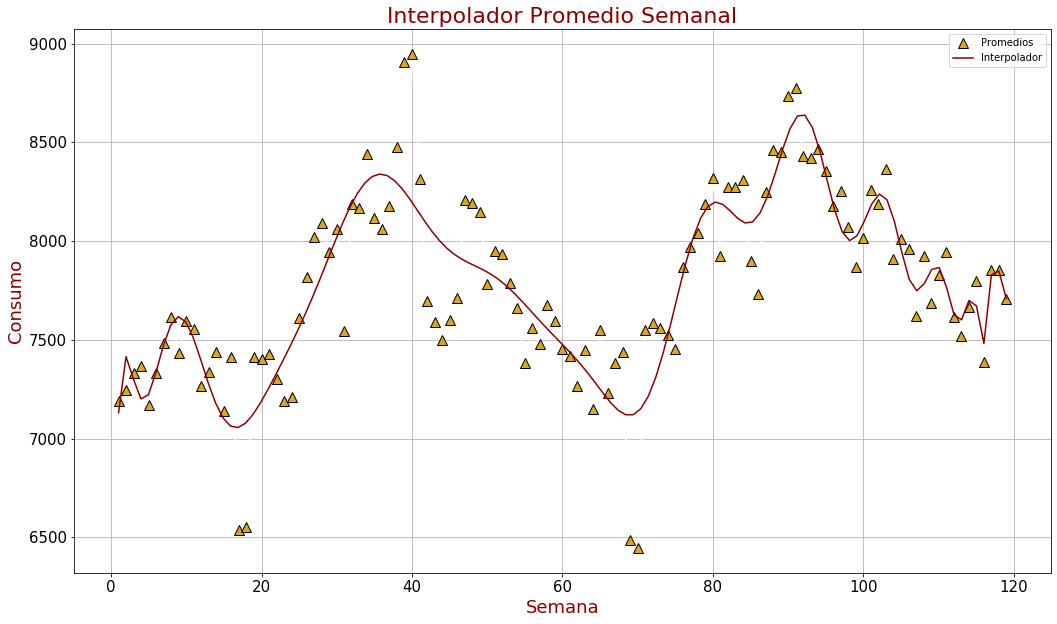

In [524]:
plt.figure(figsize = (17.5,10))
plt.plot(x_sem_i , prom_sem_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_1 , y_sem_grph_1 , color = 'darkred')
plt.title("Interpolador Promedio Semanal" , fontsize = 22 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_sem_1.png')
plt.show()

Finalmente graficaremos el interpolador junto con el conjunto de test para ver que tan fiable es el modelo obtenido

In [525]:
mpoints = len(prom_sem) + 1
x_sem_grph_2 = np.linspace(min(x_sem) , max(x_sem) , mpoints)
y_sem_grph_2 = np.polyval(inter_sem , x_sem_grph_2)

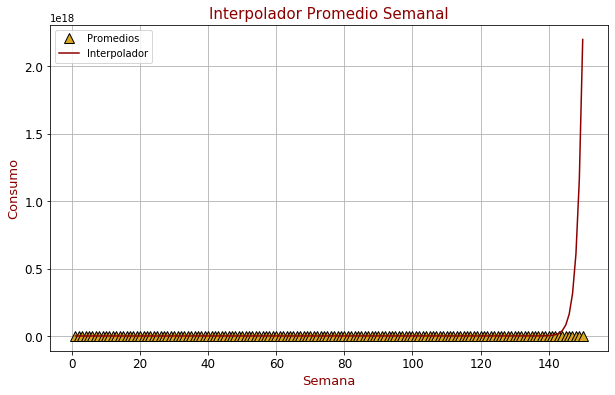

In [526]:
plt.figure(figsize = (10,6))
plt.plot(x_sem , prom_sem , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_2 , y_sem_grph_2 , color = 'darkred')
plt.title("Interpolador Promedio Semanal" , fontsize = 15, color = 'darkred')
plt.xlabel("Semana" , fontsize = 13 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 13 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(True)
plt.savefig('Inter_sem_2.png')
plt.show()

Hagamos un acercamiento en donde diverge el interpolador con los demás puntos

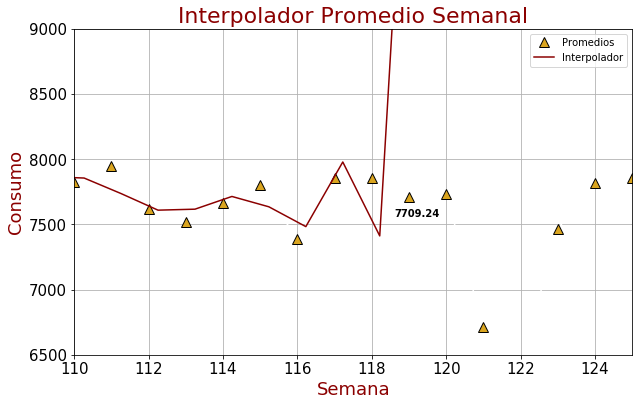

In [527]:
plt.figure(figsize = (10,6))
plt.plot(x_sem , prom_sem , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_sem_grph_2 , y_sem_grph_2 , color = 'darkred')
plt.text(118.6, data_sem_i.iat[118,0] -150 , str(7709.24) , horizontalalignment = 'left' , fontweight = "bold")
plt.title("Interpolador Promedio Semanal" , fontsize = 22 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim([110, 125]) 
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_sem_3.png')
plt.show()

**Errores:**

En esta parte obtendremos los errores cuadráticos medios de nuestro modelos y los promedios del conjunto de entrenamiento. No sacaraemos los errores respecto al conjunto de prueba porque de la gráfica se observa que serán extremadamente grandes debido a que divergen enormemente de los dmeás promedios.

In [477]:
prom_sem_obj_80 = prom_a_sem_i
x_sem_80 = x_sem_i
prom_sem_80 = inter_sem

Ahora calculemos los errores

In [478]:
ecm_sem = MSE(prom_sem_obj_80 , prom_sem_80)
print(ecm_sem)

60056445.23077821


Vemos que incluso los errores cuadráticos medios osn muy grandes incluso respecto al conjunto de entrnamiento.

+ **Mes**

Se repetirá el procedimiento anterior para los promedios mensuales

In [344]:
aux_2 = 4
len(prom_sem)%4

2

In [345]:
#Ahora hagámoslo por mes usando el dataframe anterior
num_m = int(len(prom_sem)/4)
print("El número de meses registrados son aproximadamente " + str(num_m))

El número de meses registrados son aproximadamente 37


In [346]:
prom_mes = []
for i in range(0,num_m):
    ini = 4*i
    end = 4*(1+i)
    data_i = data_sem[ini:end]
    prom_mes.append(data_i["Promedio"].mean())

In [347]:
prom_mes

[7285.460268751487,
 7400.124542248513,
 7462.5290447247025,
 7333.035322370535,
 6976.139683071429,
 7283.508775816964,
 7884.786914772321,
 7935.978321473215,
 8196.578321721727,
 8627.949431723213,
 7774.764048645834,
 7928.458489922619,
 7953.865509260417,
 7598.409539511904,
 7551.6820763318465,
 7320.622599465774,
 7400.185399532738,
 7017.390314367559,
 7601.3055819181545,
 8130.052324486607,
 8195.724252488097,
 8086.864735035714,
 8599.412777272322,
 8354.646350541667,
 8052.294688273809,
 8180.1891605818455,
 7878.221837830358,
 7768.414520651786,
 7593.689081572917,
 7786.798016864584,
 7102.5968864985125,
 7694.116693946429,
 8210.2555446503,
 7930.781457331846,
 7008.239334861606,
 7495.371733497024,
 7995.248408486606]

Añadamos las dos semanas restantes

In [348]:
prom_mes.append(data_sem[148:150]["Promedio"].mean())

In [349]:
prom_mes

[7285.460268751487,
 7400.124542248513,
 7462.5290447247025,
 7333.035322370535,
 6976.139683071429,
 7283.508775816964,
 7884.786914772321,
 7935.978321473215,
 8196.578321721727,
 8627.949431723213,
 7774.764048645834,
 7928.458489922619,
 7953.865509260417,
 7598.409539511904,
 7551.6820763318465,
 7320.622599465774,
 7400.185399532738,
 7017.390314367559,
 7601.3055819181545,
 8130.052324486607,
 8195.724252488097,
 8086.864735035714,
 8599.412777272322,
 8354.646350541667,
 8052.294688273809,
 8180.1891605818455,
 7878.221837830358,
 7768.414520651786,
 7593.689081572917,
 7786.798016864584,
 7102.5968864985125,
 7694.116693946429,
 8210.2555446503,
 7930.781457331846,
 7008.239334861606,
 7495.371733497024,
 7995.248408486606,
 7695.375874041666]

In [350]:
prom_a_mes = np.array(prom_mes)
print(prom_mes)
print("")
x_mes = np.array(list(range(1,39)))
print(x_mes)

[7285.460268751487, 7400.124542248513, 7462.5290447247025, 7333.035322370535, 6976.139683071429, 7283.508775816964, 7884.786914772321, 7935.978321473215, 8196.578321721727, 8627.949431723213, 7774.764048645834, 7928.458489922619, 7953.865509260417, 7598.409539511904, 7551.6820763318465, 7320.622599465774, 7400.185399532738, 7017.390314367559, 7601.3055819181545, 8130.052324486607, 8195.724252488097, 8086.864735035714, 8599.412777272322, 8354.646350541667, 8052.294688273809, 8180.1891605818455, 7878.221837830358, 7768.414520651786, 7593.689081572917, 7786.798016864584, 7102.5968864985125, 7694.116693946429, 8210.2555446503, 7930.781457331846, 7008.239334861606, 7495.371733497024, 7995.248408486606, 7695.375874041666]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


In [351]:
data_mes = pd.DataFrame(prom_mes, columns = ['Promedio']) 

In [352]:
mes = pd.DataFrame(x_mes, columns = ['Mes']) 
data_mes['Mes'] = mes['Mes']

In [353]:
data_mes

Promedio  Mes
0   7285.460269    1
1   7400.124542    2
2   7462.529045    3
3   7333.035322    4
4   6976.139683    5
5   7283.508776    6
6   7884.786915    7
7   7935.978321    8
8   8196.578322    9
9   8627.949432   10
10  7774.764049   11
11  7928.458490   12
12  7953.865509   13
13  7598.409540   14
14  7551.682076   15
15  7320.622599   16
16  7400.185400   17
17  7017.390314   18
18  7601.305582   19
19  8130.052324   20
20  8195.724252   21
21  8086.864735   22
22  8599.412777   23
23  8354.646351   24
24  8052.294688   25
25  8180.189161   26
26  7878.221838   27
27  7768.414521   28
28  7593.689082   29
29  7786.798017   30
30  7102.596886   31
31  7694.116694   32
32  8210.255545   33
33  7930.781457   34
34  7008.239335   35
35  7495.371733   36
36  7995.248408   37
37  7695.375874   38

Para el conjunto de teste tomemos hasta el mes 32 ya que sería el números de meses más aproximados al $\%80$ del conjunto total de los promedios mensuales

In [354]:
num_m_i = 32
prom_mes_i = []
for i in range(0,num_m_i):
    ini = i
    end = 1+i
    data_i = data_mes[ini:end]
    prom_mes_i.append(data_i["Promedio"].mean())

In [355]:
prom_a_mes_i = np.array(prom_mes_i)
x_mes_i = np.array(list(range(1,len(prom_mes_i)+1)))
print(x_mes_i)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


In [386]:
data_mes_i.iat[0,0]

7285.460268751487

In [356]:
data_mes_i = pd.DataFrame(prom_mes_i, columns = ['Promedio']) 
mes_i = pd.DataFrame(x_mes_i, columns = ['Mes']) 
data_mes_i['Semana'] = mes_i['Mes']
data_mes_i

Promedio  Semana
0   7285.460269       1
1   7400.124542       2
2   7462.529045       3
3   7333.035322       4
4   6976.139683       5
5   7283.508776       6
6   7884.786915       7
7   7935.978321       8
8   8196.578322       9
9   8627.949432      10
10  7774.764049      11
11  7928.458490      12
12  7953.865509      13
13  7598.409540      14
14  7551.682076      15
15  7320.622599      16
16  7400.185400      17
17  7017.390314      18
18  7601.305582      19
19  8130.052324      20
20  8195.724252      21
21  8086.864735      22
22  8599.412777      23
23  8354.646351      24
24  8052.294688      25
25  8180.189161      26
26  7878.221838      27
27  7768.414521      28
28  7593.689082      29
29  7786.798017      30
30  7102.596886      31
31  7694.116694      32

**Interpolador**

In [439]:
# Interpolador mes
d_mes = len(prom_a_mes_i) - 1

In [440]:
d_mes = len(prom_mes_i) - 1
inter_mes = np.polyfit(x_mes_i , prom_a_mes_i , d_mes)
print(inter_mes)

[ 7.62901262e-34 -1.18087212e-31  5.75636672e-30 -2.04304852e-29
 -4.77702873e-27 -1.32955582e-26  4.30222412e-24  8.09223585e-23
 -2.77593976e-21 -1.34139508e-19  1.96259458e-19  1.41337120e-16
  2.38123202e-15 -1.07685610e-13 -4.07051516e-12  6.61759341e-11
  4.86102505e-09 -5.34842915e-08 -5.09765387e-06  1.03807518e-04
  3.65213875e-03 -2.16524564e-01  5.20896262e+00 -7.75739661e+01
  7.88707572e+02 -5.64990241e+03  2.86046366e+04 -1.00694013e+05
  2.37696703e+05 -3.52645305e+05  2.90949746e+05 -9.16923146e+04]


In [441]:
mpoints = len(prom_sem_i) + 1
x_mes_grph_1 = np.linspace(min(x_mes_i) , max(x_mes_i) , mpoints)
y_mes_grph_1 = np.polyval(inter_mes , x_mes_grph_1)

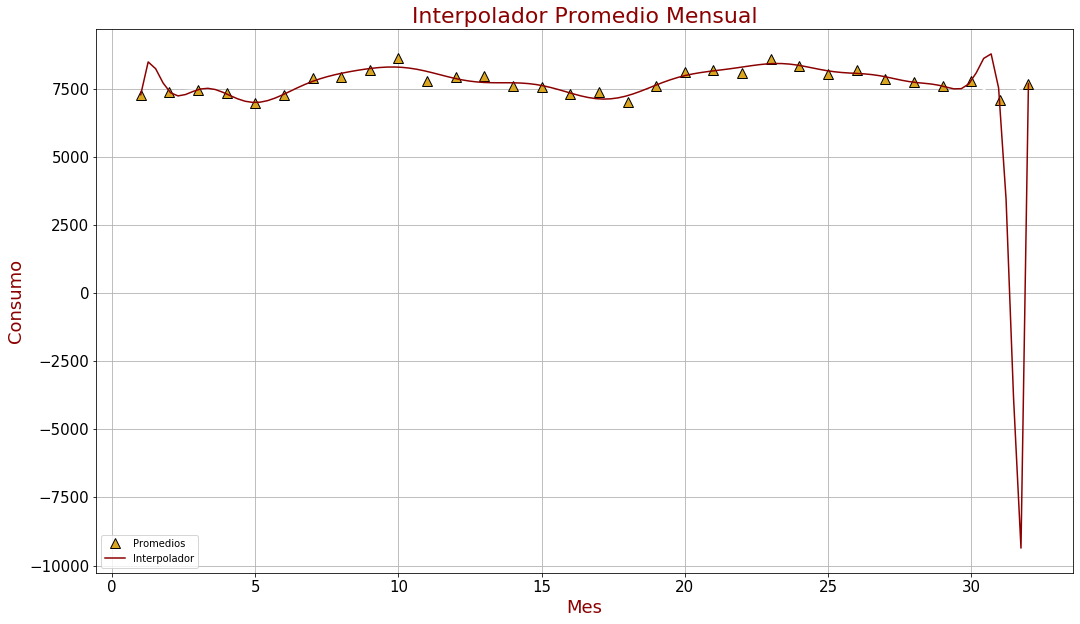

In [519]:
plt.figure(figsize = (17.5,10))
plt.plot(x_mes_i , prom_mes_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_1 , y_mes_grph_1 , color = 'darkred')
plt.title("Interpolador Promedio Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid(True)
plt.savefig('Inter_mes_1.png')
plt.show()

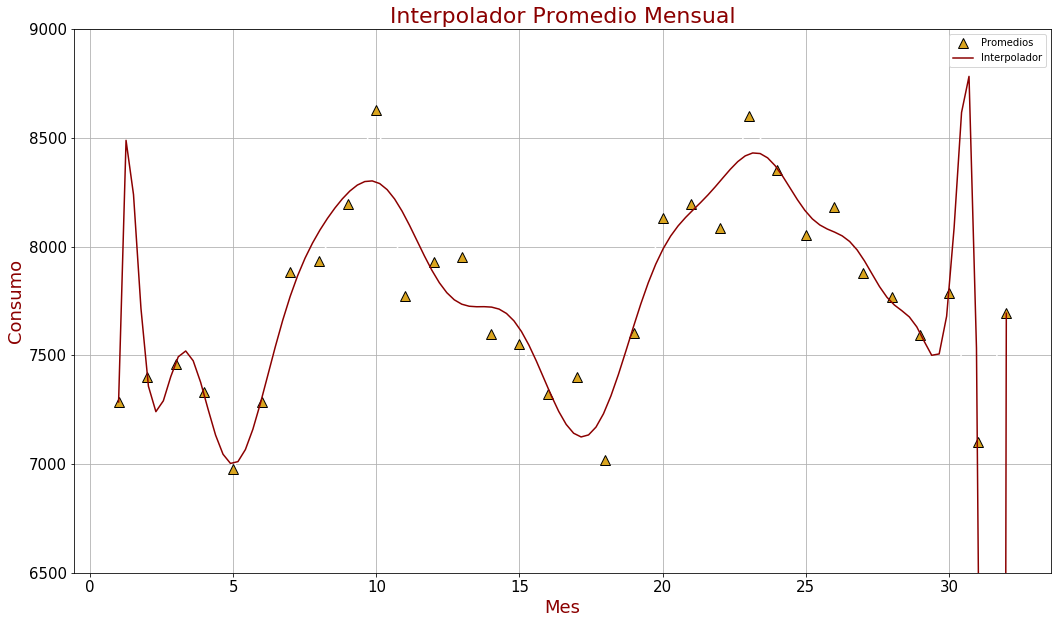

In [520]:
plt.figure(figsize = (17.5,10))
plt.plot(x_mes_i , prom_mes_i , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_1 , y_mes_grph_1 , color = 'darkred')
plt.title("Interpolador Promedio Mensual" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_mes_2.png')
plt.show()

Análogamente al caso anterior, veamos si este modelo se acerca a los promedio de los meses restantes

In [516]:
mpoints = len(prom_mes) + 1
x_mes_grph_2 = np.linspace(min(x_mes) , max(x_mes) , mpoints)
y_mes_grph_2 = np.polyval(inter_mes , x_mes_grph_2)

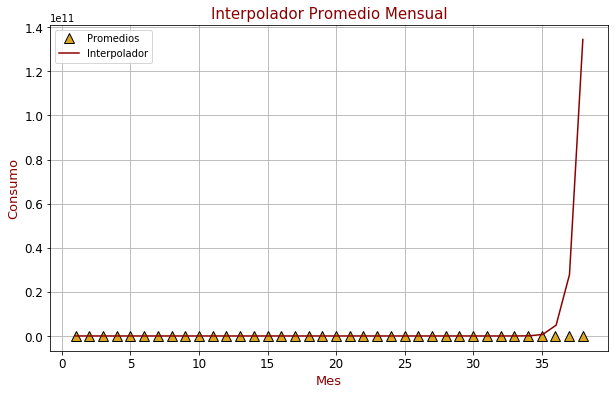

In [521]:
plt.figure(figsize = (10,6))
plt.plot(x_mes , prom_mes , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_2 , y_mes_grph_2 , color = 'darkred')
plt.title("Interpolador Promedio Mensual" , fontsize = 15 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 13 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 13 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(True)
plt.savefig('Inter_sem_3.png')
plt.show()

donde el *close-up* es

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


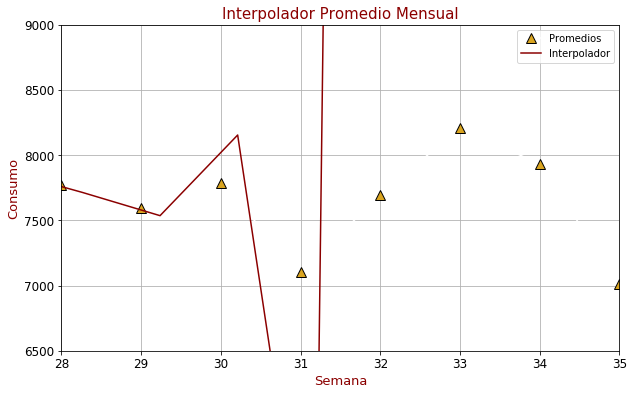

In [522]:
plt.figure(figsize = (10,6))
plt.plot(x_mes , prom_mes , color= 'white' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.plot(x_mes_grph_2 , y_mes_grph_2 , color = 'darkred')
plt.text(31.7 , data_mes_i.iat[31,0] -150 , str(data_mes_i.iat[31,0]) , horizontalalignment = 'left' , fontweight = "bold")
plt.title("Interpolador Promedio Mensual" , fontsize = 15 , color = 'darkred')
plt.xlabel("Semana" , fontsize = 13 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 13 , color = 'darkred')
plt.legend(["Promedios","Interpolador"] , loc=0)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlim([28, 35]) 
plt.ylim([6500,9000]) 
plt.grid(True)
plt.savefig('Inter_sem_4.png')
plt.show()

Se observa que el interpolador no es un buen modelo para el caso semanal ni mensual puesto que no sé acerca a los valores de su conjunto de test, respectivamente.

**Errores:**

Análogamente al caso semanal

In [479]:
prom_mes_obj_80 = prom_a_mes_i
x_mes_80 = x_mes_i
prom_mes_80 = inter_mes

In [480]:
ecm_mes = MSE(prom_mes_obj_80 , prom_mes_80)
print(ecm_mes)

8974669261.896896


Vemos que incluso, en comparación con los promedios semanales, los errores para el caso mensual son incluso mayores.

### **Histograma**

Aquí tomaremos los promedios por meses de distintos años y veremos si hay alguna distribución reconocible.

El dataset *Datos_csv.csv* emmpieza desde el mes de Septiembre del año 2017 y termina 

In [427]:
Meses = ['Enero' , 'Febrero' , 'Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 
                        'Agosto' , 'Septiembre' , 'Octubre' , 'Nobiembre' , 'Diciembre']

In [408]:
x_hist_etiqueta = np.array(['Enero' , 'Febrero' , 'Marzo' , 'Abril' , 'Mayo' , 'Junio' , 'Julio' , 
                        'Agosto' , 'Septiembre' , 'Octubre' , 'Nobiembre' , 'Diciembre'])
print(x_hist_etiqueta)

['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Nobiembre' 'Diciembre']


In [409]:
prom_hist = [1,2,3,4,5,6,7,8,9,10,11,12]
prom_hist[8] = (data_mes.iat[0,0] + data_mes.iat[12,0] + data_mes.iat[24,0])/3
prom_hist[9] = (data_mes.iat[1,0] + data_mes.iat[13,0] + data_mes.iat[25,0])/3
prom_hist[10] = (data_mes.iat[2,0] + data_mes.iat[14,0] + data_mes.iat[26,0])/3
prom_hist[11] = (data_mes.iat[3,0] + data_mes.iat[15,0] + data_mes.iat[27,0])/3
prom_hist[0] = (data_mes.iat[4,0] + data_mes.iat[16,0] + data_mes.iat[28,0])/3
prom_hist[1] = (data_mes.iat[5,0] + data_mes.iat[17,0] + data_mes.iat[29,0] + data_mes.iat[36,0])/4
prom_hist[2] = (data_mes.iat[6,0] + data_mes.iat[18,0] + data_mes.iat[30,0] + data_mes.iat[37,0])/4
prom_hist[3] = (data_mes.iat[7,0] + data_mes.iat[19,0] + data_mes.iat[31,0])/3
prom_hist[4] = (data_mes.iat[8,0] + data_mes.iat[20,0] + data_mes.iat[32,0])/3
prom_hist[5] = (data_mes.iat[9,0] + data_mes.iat[21,0] + data_mes.iat[33,0])/3
prom_hist[6] = (data_mes.iat[10,0] + data_mes.iat[22,0] + data_mes.iat[34,0])/3
prom_hist[7] = (data_mes.iat[11,0] + data_mes.iat[23,0] + data_mes.iat[35,0])/3

In [410]:
y_hist = np.array(prom_hist)

In [411]:
x_hist = np.array(list(range(1,13)))
print(x_hist)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [421]:
hist_mes = pd.DataFrame(x_hist , columns = ['Mes']) 
hist_etiqueta = pd.DataFrame(x_hist_etiqueta , columns = ['Nom Mes'])
prom_hist_df = pd.DataFrame(prom_hist , columns = ['Promedio']) 
hist_mes['Nom Mes'] = hist_etiqueta['Nom Mes']
hist_mes['Promedio'] = prom_hist_df['Promedio']
hist_mes

Mes     Nom Mes     Promedio
0     1       Enero  7323.338055
1     2     Febrero  7520.736379
2     3       Marzo  7571.016314
3     4       Abril  7920.049113
4     5        Mayo  8200.852706
5     6       Junio  8215.198541
6     7       Julio  7794.138720
7     8      Agosto  7926.158858
8     9  Septiembre  7763.873489
9    10     Octubre  7726.241081
10   11   Nobiembre  7630.810986
11   12   Diciembre  7474.024147

Ahora creemos ahora una columna con las frecuencais relativas

In [502]:
import scipy.stats as stats
import math

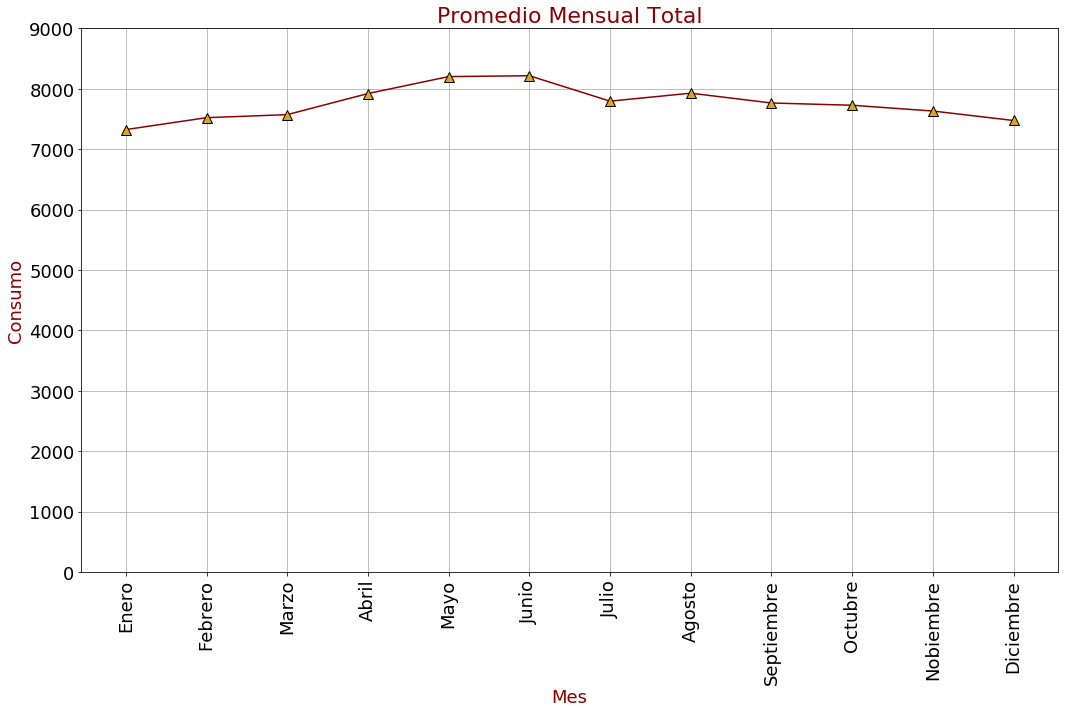

In [465]:
plt.figure(figsize = (17.5,10))
plt.plot(x_hist , prom_hist , color= 'darkred' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.title("Promedio Mensual Total" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.yticks(fontsize = 18)
plt.xticks(list(range(1,13)), Meses , rotation = 'vertical' , fontsize = 18)
plt.ylim([0,9000]) 
plt.grid(True)
plt.savefig('Inter_mes_tot_1.png')
plt.show()

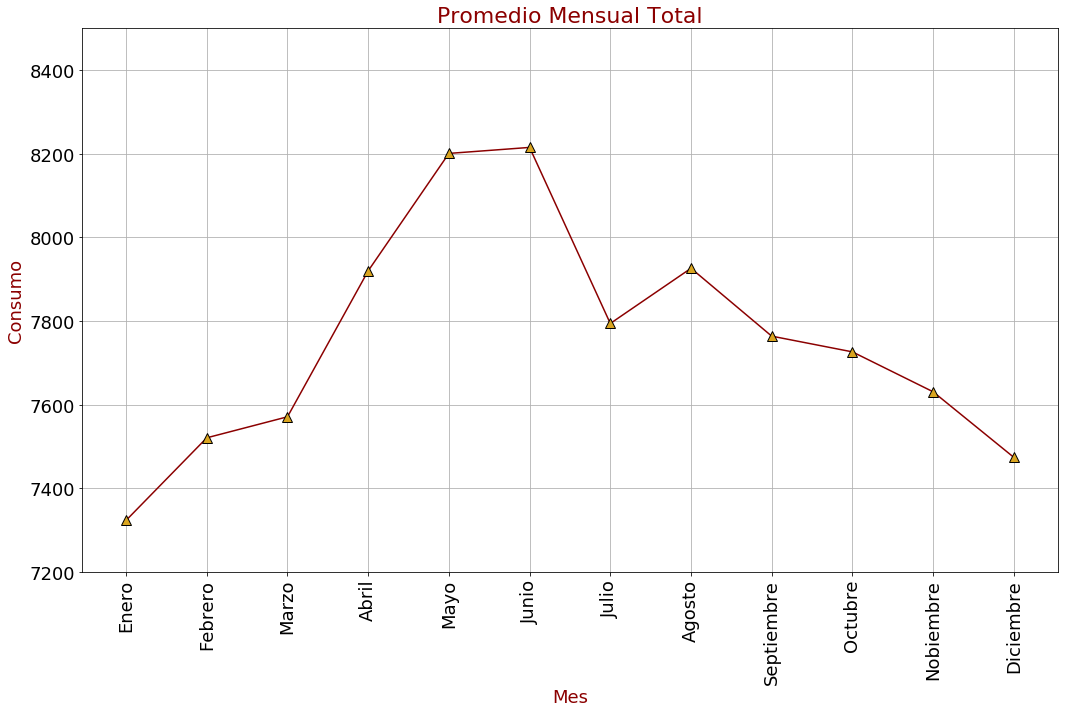

In [467]:
plt.figure(figsize = (17.5,10))
plt.plot(x_hist , prom_hist , color= 'darkred' ,
         marker = '^' , markersize = 10.0 , markeredgecolor='black' , markerfacecolor = 'goldenrod')
plt.title("Promedio Mensual Total" , fontsize = 22 , color = 'darkred')
plt.xlabel("Mes" , fontsize = 18 , color = 'darkred')
plt.ylabel("Consumo" , fontsize = 18 , color = 'darkred')
plt.yticks(fontsize = 18)
plt.xticks(list(range(1,13)), Meses , rotation = 'vertical' , fontsize = 18)
plt.ylim([0,9000]) 
plt.grid(True)
plt.ylim([7200,8500]) 
plt.savefig('Inter_mes_tot_2.png')
plt.show()

De esto se observa que en la regió oriente de México se consume mucho mayor energía en Verano mientras que en Invierno tiende a consumirse la menor engería.

### **Gráficas Generales de los Promedios:**

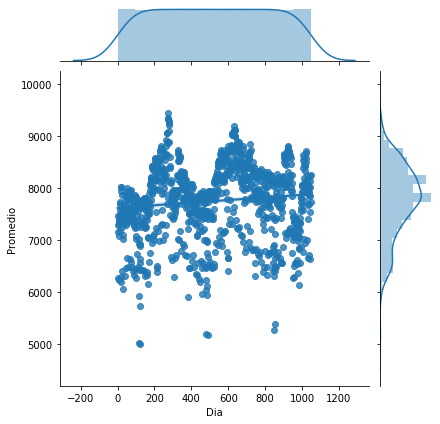

In [178]:
# Dia
dia_sp_reg = sns.jointplot(data = data_dia , x = 'Dia' , y = 'Promedio' , kind = 'reg')

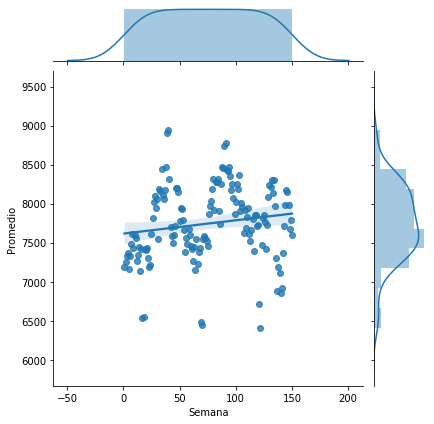

In [150]:
# Semana
sem_sp_reg = sns.jointplot(data = data_sem , x = 'Semana' , y = 'Promedio' , kind = 'reg')

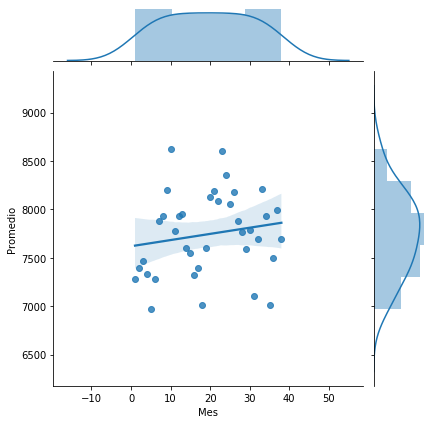

In [151]:
# Mes
mes_sp_reg = sns.jointplot(data = data_mes , x = 'Mes' , y = 'Promedio' , kind = 'reg')